In [30]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

In [31]:
path = 'https://raw.githubusercontent.com/ovibaridar/Data_sets/main/Bank%20Data.csv'

In [32]:
data = pd.read_csv(path)

In [33]:
data.head(3)

ID Customer_ID      Month           Name Age          SSN Occupation  \
0  0x160a   CUS_0xd40  September  Aaron Maashoh  23  821-00-0265  Scientist   
1  0x160b   CUS_0xd40    October  Aaron Maashoh  24  821-00-0265  Scientist   
2  0x160c   CUS_0xd40   November  Aaron Maashoh  24  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      19114.12            1824.843333                  3  ...   
1      19114.12            1824.843333                  3  ...   
2      19114.12            1824.843333                  3  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0        Good           809.98                35.030402   
1                   4.0        Good           809.98                33.053114   
2                   4.0        Good           809.98                33.811894   

       Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0   22 Years and 9 Months                    No           49.574949   
1  22 Years and 10 Months                    No           49.574949   
2                     NaN                    No           49.574949   

   Amount_invested_monthly                 Payment_Behaviour  \
0       236.64268203272135    Low_spent_Small_value_payments   
1       21.465380264657146  High_spent_Medium_value_payments   
2       148.23393788500925   Low_spent_Medium_value_payments   

      Monthly_Balance  
0  186.26670208571772  
1  361.44400385378196  
2  264.67544623342997  

[3 rows x 27 columns]

In [34]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [35]:
data = data[['Annual_Income', 'Monthly_Inhand_Salary' , 'Num_Bank_Accounts' , 'Outstanding_Debt' ,'Credit_Utilization_Ratio' ,'Credit_History_Age' , 'Total_EMI_per_month' , 'Payment_Behaviour' ]]


In [36]:
data.head()

Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts Outstanding_Debt  \
0      19114.12            1824.843333                  3           809.98   
1      19114.12            1824.843333                  3           809.98   
2      19114.12            1824.843333                  3           809.98   
3      19114.12                    NaN                  3           809.98   
4      34847.84            3037.986667                  2           605.03   

   Credit_Utilization_Ratio      Credit_History_Age  Total_EMI_per_month  \
0                 35.030402   22 Years and 9 Months            49.574949   
1                 33.053114  22 Years and 10 Months            49.574949   
2                 33.811894                     NaN            49.574949   
3                 32.430559   23 Years and 0 Months            49.574949   
4                 25.926822   27 Years and 3 Months            18.816215   

                  Payment_Behaviour  
0    Low_spent_Small_value_payments  
1  High_spent_Medium_value_payments  
2   Low_spent_Medium_value_payments  
3  High_spent_Medium_value_payments  
4   High_spent_Large_value_payments

In [37]:
data[['Years', 'Months']] = data['Credit_History_Age'].str.extract(r'(\d+) Years and (\d+) Months')
data[['Years', 'Months']] = data[['Years', 'Months']].fillna(0).astype(int)

# Conversion factors
days_in_year = 365.25
days_in_month = 30.44

# Applying the conversion to the entire DataFrame
data['Total_Days'] = (data['Years'] * days_in_year) + (data['Months'] * days_in_month)

# Drop intermediate columns if needed
data = data.drop(['Years', 'Months'], axis=1)


In [38]:
data.head()

Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts Outstanding_Debt  \
0      19114.12            1824.843333                  3           809.98   
1      19114.12            1824.843333                  3           809.98   
2      19114.12            1824.843333                  3           809.98   
3      19114.12                    NaN                  3           809.98   
4      34847.84            3037.986667                  2           605.03   

   Credit_Utilization_Ratio      Credit_History_Age  Total_EMI_per_month  \
0                 35.030402   22 Years and 9 Months            49.574949   
1                 33.053114  22 Years and 10 Months            49.574949   
2                 33.811894                     NaN            49.574949   
3                 32.430559   23 Years and 0 Months            49.574949   
4                 25.926822   27 Years and 3 Months            18.816215   

                  Payment_Behaviour  Total_Days  
0    Low_spent_Small_value_payments     8309.46  
1  High_spent_Medium_value_payments     8339.90  
2   Low_spent_Medium_value_payments        0.00  
3  High_spent_Medium_value_payments     8400.75  
4   High_spent_Large_value_payments     9953.07

In [39]:
data = data.drop('Credit_History_Age', axis=1)
data = data.rename(columns={'Total_Days': 'Credit_History_Age(days)'})

In [40]:
data.head(3)

Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts Outstanding_Debt  \
0      19114.12            1824.843333                  3           809.98   
1      19114.12            1824.843333                  3           809.98   
2      19114.12            1824.843333                  3           809.98   

   Credit_Utilization_Ratio  Total_EMI_per_month  \
0                 35.030402            49.574949   
1                 33.053114            49.574949   
2                 33.811894            49.574949   

                  Payment_Behaviour  Credit_History_Age(days)  
0    Low_spent_Small_value_payments                   8309.46  
1  High_spent_Medium_value_payments                   8339.90  
2   Low_spent_Medium_value_payments                      0.00

# target variable

In [41]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
!@9#%8                               3800
Name: count, dtype: int64

In [42]:
data = data[data['Payment_Behaviour'] != '!@9#%8']

In [43]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
Name: count, dtype: int64

# Data Exploration and Preprocessing:

In [44]:
data.isnull().sum()

Annual_Income                  0
Monthly_Inhand_Salary       6949
Num_Bank_Accounts              0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Total_EMI_per_month            0
Payment_Behaviour              0
Credit_History_Age(days)       0
dtype: int64

In [45]:
data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].fillna(data['Monthly_Inhand_Salary'].mean())

In [46]:
data.isnull().sum()

Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Payment_Behaviour           0
Credit_History_Age(days)    0
dtype: int64

In [47]:
data.duplicated().sum()

0

<Axes: xlabel='Payment_Behaviour', ylabel='count'>

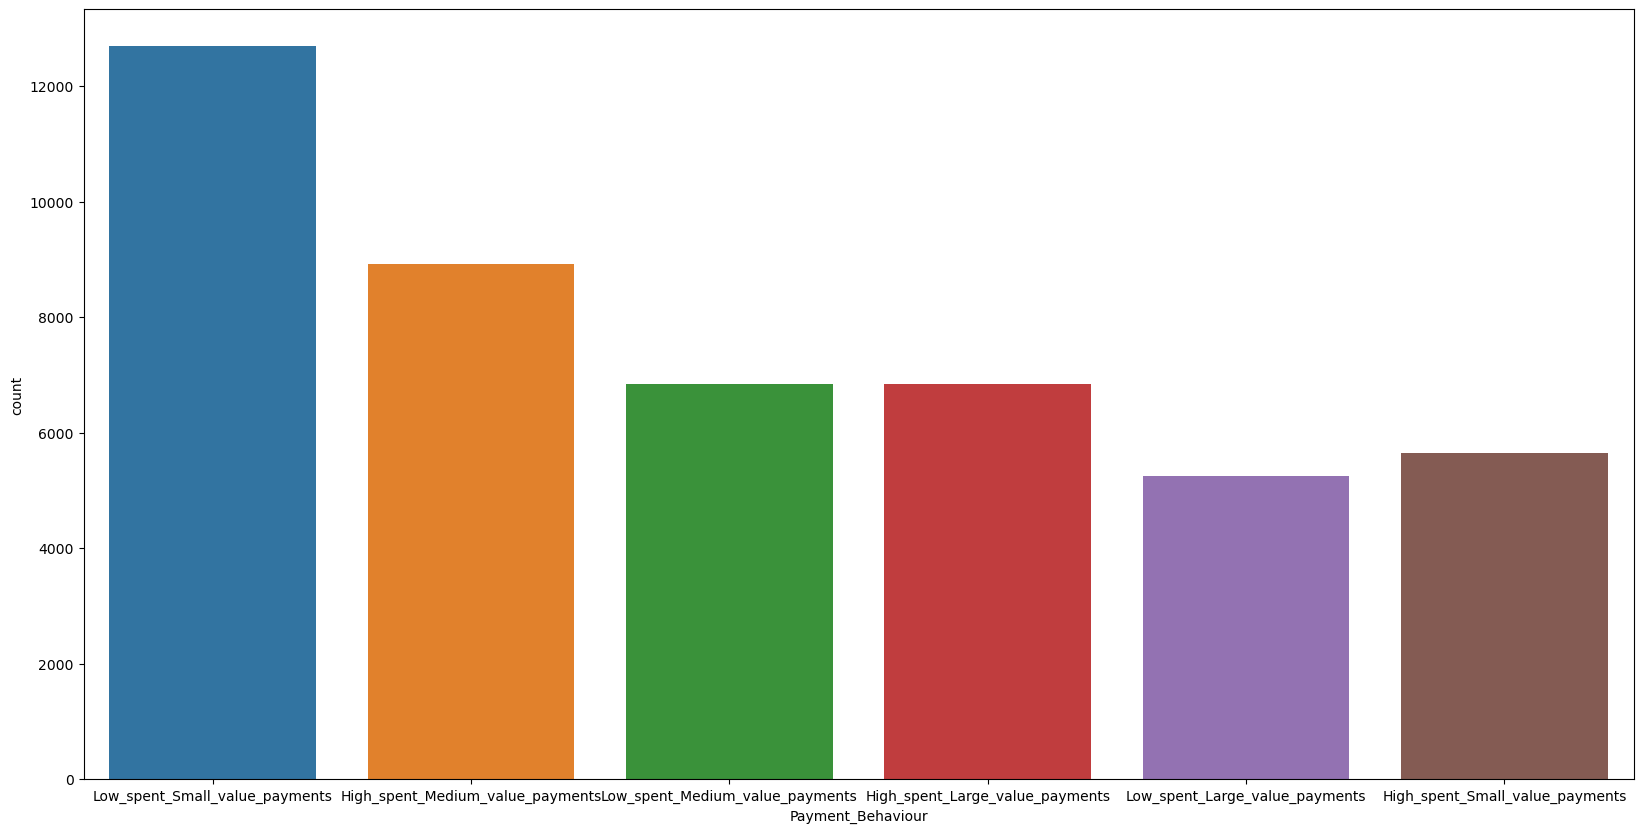

In [48]:
plt.figure(figsize=[20,10])
sn.countplot(x='Payment_Behaviour', data=data)

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
data['Payment_Behaviour'] = le.fit_transform(data['Payment_Behaviour'])

In [51]:
data.head(3)

Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts Outstanding_Debt  \
0      19114.12            1824.843333                  3           809.98   
1      19114.12            1824.843333                  3           809.98   
2      19114.12            1824.843333                  3           809.98   

   Credit_Utilization_Ratio  Total_EMI_per_month  Payment_Behaviour  \
0                 35.030402            49.574949                  5   
1                 33.053114            49.574949                  1   
2                 33.811894            49.574949                  4   

   Credit_History_Age(days)  
0                   8309.46  
1                   8339.90  
2                      0.00

In [52]:
print("Mapping for 'Payment_Behaviour':")
for original_value, numeric_code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original_value}: {numeric_code}")

Mapping for 'Payment_Behaviour':
High_spent_Large_value_payments: 0
High_spent_Medium_value_payments: 1
High_spent_Small_value_payments: 2
Low_spent_Large_value_payments: 3
Low_spent_Medium_value_payments: 4
Low_spent_Small_value_payments: 5


In [53]:
from imblearn.over_sampling import RandomOverSampler
rnd = RandomOverSampler()

In [54]:
x = data.drop('Payment_Behaviour' , axis = 1)
y = data['Payment_Behaviour']

In [55]:
y.value_counts()

Payment_Behaviour
5    12694
1     8922
0     6844
4     6837
2     5651
3     5252
Name: count, dtype: int64

In [56]:
x , y = rnd.fit_resample(x,y)

In [57]:
y.value_counts()

Payment_Behaviour
5    12694
1    12694
4    12694
0    12694
3    12694
2    12694
Name: count, dtype: int64